**Natural Image Classification**

The dataset contains 6,899 images from 8 distinct classes compiled from various sources. 

The classes include airplane, car, cat, dog, flower, fruit, motorbike and person.

**Acknowledgement**

Airplane images obtained from http://host.robots.ox.ac.uk/pascal/VOC

Car images obtained from https://ai.stanford.edu/~jkrause/cars/car_dataset.html

Cat images obtained from https://www.kaggle.com/c/dogs-vs-cats

Dog images obtained from https://www.kaggle.com/c/dogs-vs-cats

Flower images obtained from http://www.image-net.org

Fruit images obtained from https://www.kaggle.com/moltean/fruits

Motorbike images obtained from http://host.robots.ox.ac.uk/pascal/VOC

Person images obtained from http://www.briancbecker.com/blog/research/pubfig83-lfw-dataset

**Source - Kaggle**

https://www.kaggle.com/prasunroy/natural-images

**Project Overview**

**1- Exploratory Data Analysis**

**2- Train and Test Split**

**3- Random Forest Classifier**

**4- Convolutional Neural Network**

**5- Predictions**

**6- Results and Comparison**

**7- Saving the Model**

**Exploratory Data Analysis - EDA**

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import cv2   #computer vision library of python
import os    #this library is used for accessing the directory
import tensorflow as tf

In [38]:
#combined all the images in a single folder 'Images'
#let us see an image from the dataset
loc='C:/Users/Bhuvanjeet/Natural Images/Images/flower_0234.jpg'

In [39]:
f=cv2.imread(loc)  #features of image which is basically the pixel values

In [40]:
f

array([[[ 15,  37,  78],
        [ 14,  36,  77],
        [ 13,  36,  74],
        ...,
        [ 50,  91, 130],
        [ 50,  91, 130],
        [ 51,  92, 131]],

       [[ 11,  31,  72],
        [  8,  31,  69],
        [  9,  30,  68],
        ...,
        [ 48,  89, 128],
        [ 48,  88, 130],
        [ 48,  89, 128]],

       [[  9,  28,  66],
        [  5,  27,  63],
        [  6,  25,  62],
        ...,
        [ 45,  85, 127],
        [ 44,  83, 127],
        [ 44,  84, 126]],

       ...,

       [[ 70, 124, 107],
        [ 69, 123, 106],
        [ 71, 126, 109],
        ...,
        [  4,  74, 181],
        [  3,  75, 183],
        [  4,  77, 185]],

       [[ 69, 123, 106],
        [ 68, 122, 105],
        [ 69, 124, 107],
        ...,
        [  2,  72, 179],
        [  0,  72, 180],
        [  0,  73, 181]],

       [[ 67, 122, 107],
        [ 66, 121, 106],
        [ 68, 123, 106],
        ...,
        [  3,  69, 181],
        [  0,  69, 177],
        [  0,  70, 178]]

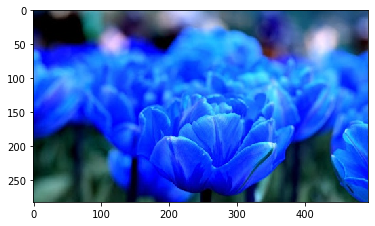

In [41]:
plt.imshow(f)  #colors may differ than original image since colors are shown acc to the matplotlib library.
#or use 
#cv2.imshow("image",f)
#cv2.waitKey(0)

In [3]:
#So, we have to access all the features and then access all the labels
img_loc='C:/Users/Bhuvanjeet/Natural Images/Images'

In [43]:
os.listdir(img_loc)     #we are getting the names of each image

['airplane_0000.jpg',
 'airplane_0001.jpg',
 'airplane_0002.jpg',
 'airplane_0003.jpg',
 'airplane_0004.jpg',
 'airplane_0005.jpg',
 'airplane_0006.jpg',
 'airplane_0007.jpg',
 'airplane_0008.jpg',
 'airplane_0009.jpg',
 'airplane_0010.jpg',
 'airplane_0011.jpg',
 'airplane_0012.jpg',
 'airplane_0013.jpg',
 'airplane_0014.jpg',
 'airplane_0015.jpg',
 'airplane_0016.jpg',
 'airplane_0017.jpg',
 'airplane_0018.jpg',
 'airplane_0019.jpg',
 'airplane_0020.jpg',
 'airplane_0021.jpg',
 'airplane_0022.jpg',
 'airplane_0023.jpg',
 'airplane_0024.jpg',
 'airplane_0025.jpg',
 'airplane_0026.jpg',
 'airplane_0027.jpg',
 'airplane_0028.jpg',
 'airplane_0029.jpg',
 'airplane_0030.jpg',
 'airplane_0031.jpg',
 'airplane_0032.jpg',
 'airplane_0033.jpg',
 'airplane_0034.jpg',
 'airplane_0035.jpg',
 'airplane_0036.jpg',
 'airplane_0037.jpg',
 'airplane_0038.jpg',
 'airplane_0039.jpg',
 'airplane_0040.jpg',
 'airplane_0041.jpg',
 'airplane_0042.jpg',
 'airplane_0043.jpg',
 'airplane_0044.jpg',
 'airplane

In [4]:
label=[]
for i in os.listdir(img_loc):
    if(i.split('_')[0] == 'airplane'):
        label.append('airplane')
    elif(i.split('_')[0] == 'car'):
        label.append('car')
    elif(i.split('_')[0] == 'cat'):
        label.append('cat')
    elif(i.split('_')[0] == 'dog'):
        label.append('dog')
    elif(i.split('_')[0] == 'flower'):
        label.append('flower')
    elif(i.split('_')[0] == 'fruit'):
        label.append('fruit')
    elif(i.split('_')[0] == 'motorbike'):
        label.append('motorbike')
    elif(i.split('_')[0] == 'person'):
        label.append('person')

In [5]:
label = np.array(label)

In [6]:
label

array(['airplane', 'airplane', 'airplane', ..., 'person', 'person',
       'person'], dtype='<U9')

In [44]:
#for accessing the features we don't need only names but need complete location
for i in os.listdir(img_loc):   #i is the name of the image
    print(os.path.join(img_loc,i))   

C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0000.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0001.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0002.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0003.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0004.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0005.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0006.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0007.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0008.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0009.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0010.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0011.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0012.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0013.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0014.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\airplane_0015.jpg
C:/Users/Bhuvanjeet/Natural Images/Image

C:/Users/Bhuvanjeet/Natural Images/Images\cat_0441.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0442.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0443.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0444.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0445.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0446.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0447.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0448.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0449.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0450.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0451.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0452.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0453.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0454.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0455.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0456.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0457.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\cat_0458.jpg
C:/Users/B

C:/Users/Bhuvanjeet/Natural Images/Images\flower_0565.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0566.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0567.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0568.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0569.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0570.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0571.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0572.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0573.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0574.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0575.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0576.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0577.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0578.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0579.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0580.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\flower_0581.jpg
C:/Users/Bhuva

C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0469.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0470.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0471.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0472.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0473.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0474.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0475.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0476.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0477.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0478.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0479.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0480.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0481.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0482.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0483.jpg
C:/Users/Bhuvanjeet/Natural Images/Images\motorbike_0484.jpg
C:/Users/Bhuvanjeet/Natu

In [7]:
features=[]
for i in os.listdir(img_loc):    
    f=cv2.imread(os.path.join(img_loc,i)) 
    fr = cv2.resize(f,(120,120))   #similarly in 6899 images, all the images are not of same(uniform) shape,
    features.append(fr)            #so we will have to resize it before adding it into features.
#if we had not resized the images, then the shape would have been (6899,) 
#since the other dimension would not have been same.

In [ ]:
#################################

In [52]:
#basic understanding of problem
a=np.array([[4,7,8,9],[5,4,9,6],[2,9,1,0]])
a.shape

(3, 4)

In [53]:
a=np.array([[4,7,8,9],[5,4,9],[2,9]])
a.shape
#other dimension is not similar in other rows

(3,)

In [ ]:
#################################

In [8]:
features = np.array(features)

In [9]:
features.shape

(6899, 120, 120, 3)

In [10]:
label.shape

(6899,)

In [11]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(label)
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [12]:
y_encoded

array([0, 0, 0, ..., 7, 7, 7], dtype=int64)

In [45]:
(unique, counts) = np.unique(y_encoded, return_counts=True)

In [46]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [47]:
counts

array([ 727,  968,  885,  702,  843, 1000,  788,  986], dtype=int64)

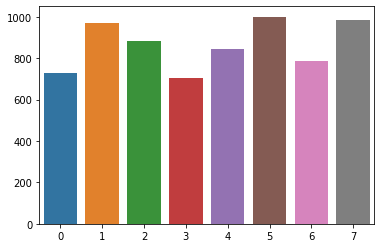

In [48]:
sns.barplot(x=unique,y=counts)

In [13]:
y_categorical

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
X=features.reshape(6899,120*120*3)   #since Random forest Classifier require a 2D matrix.

In [15]:
X.shape

(6899, 43200)

In [16]:
y=y_encoded

**Train and Test Split**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

**Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfcmodel = RandomForestClassifier()

In [20]:
rfcmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
pred = rfcmodel.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(pred,y_test))
print('Classification Report:\n',classification_report(pred,y_test))
print('\n Accuracy score:',accuracy_score(pred,y_test))

Confusion Matrix:
 [[210   4   7   4  10   0   4   0]
 [ 15 261  30  13  23   1  17   2]
 [ 10  12 189 100  32   0  14  11]
 [  2   8  42  80  16   0   9   4]
 [  8   7  14  19 178   0  10   7]
 [  0   2   1   3   0 346   0   0]
 [  8   3   4   6   5   0 213   2]
 [  1   0   2   2   0   0   0 306]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       239
           1       0.88      0.72      0.79       362
           2       0.65      0.51      0.58       368
           3       0.35      0.50      0.41       161
           4       0.67      0.73      0.70       243
           5       1.00      0.98      0.99       352
           6       0.80      0.88      0.84       241
           7       0.92      0.98      0.95       311

    accuracy                           0.78      2277
   macro avg       0.76      0.77      0.76      2277
weighted avg       0.79      0.78      0.78      2277


 Accuracy score: 0.78304

**Convolutional Neural Network**

In [23]:
features1 = features.astype('float32')/255   #normalizing the features

In [24]:
#shuffling the data
r = np.arange(features.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X1 = features1[r]   
y1 = y_categorical[r]

In [49]:
X1.shape

(6899, 120, 120, 3)

In [50]:
y1.shape

(6899, 8)

In [25]:
#splitting again for CNN
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.33)

In [26]:
#structuring the CNN model
#giving 4D matrix as input to CNN
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train1.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [27]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [28]:
#fitting the model
model.fit(X_train1, y_train1, epochs=20, validation_split=0.2)

Train on 3697 samples, validate on 925 samples
Epoch 1/20
3697/3697 [==============================] - 66s 18ms/sample - loss: 1.0137 - accuracy: 0.6546 - val_loss: 0.3764 - val_accuracy: 0.8714
Epoch 2/20
3697/3697 [==============================] - 55s 15ms/sample - loss: 0.3787 - accuracy: 0.8664 - val_loss: 0.3236 - val_accuracy: 0.8886
Epoch 3/20
3697/3697 [==============================] - 63s 17ms/sample - loss: 0.2339 - accuracy: 0.9172 - val_loss: 0.3521 - val_accuracy: 0.8876
Epoch 4/20
3697/3697 [==============================] - 55s 15ms/sample - loss: 0.1677 - accuracy: 0.9405 - val_loss: 0.3274 - val_accuracy: 0.8897
Epoch 5/20
3697/3697 [==============================] - 66s 18ms/sample - loss: 0.1079 - accuracy: 0.9594 - val_loss: 0.2575 - val_accuracy: 0.9200
Epoch 6/20
3697/3697 [==============================] - 62s 17ms/sample - loss: 0.0887 - accuracy: 0.9686 - val_loss: 0.3646 - val_accuracy: 0.8908
Epoch 7/20
3697/3697 [==============================] - 63s 17ms/

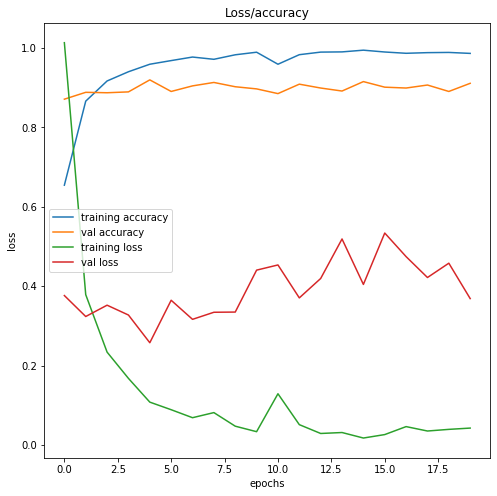

In [29]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='val accuracy')
plt.plot(model.history.history['loss'], label='training loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
X_test1

array([[[[0.24705882, 0.1764706 , 0.10980392],
         [0.24705882, 0.17254902, 0.10980392],
         [0.24705882, 0.1764706 , 0.10980392],
         ...,
         [0.2901961 , 0.23529412, 0.16470589],
         [0.2901961 , 0.23529412, 0.16470589],
         [0.2901961 , 0.23529412, 0.16470589]],

        [[0.25490198, 0.18039216, 0.1254902 ],
         [0.25490198, 0.18039216, 0.12941177],
         [0.25490198, 0.18039216, 0.1254902 ],
         ...,
         [0.2901961 , 0.23529412, 0.16470589],
         [0.2901961 , 0.23529412, 0.16470589],
         [0.2901961 , 0.23529412, 0.16470589]],

        [[0.2627451 , 0.18039216, 0.1254902 ],
         [0.2627451 , 0.18039216, 0.1254902 ],
         [0.2627451 , 0.18039216, 0.1254902 ],
         ...,
         [0.29411766, 0.23137255, 0.16470589],
         [0.29411766, 0.23137255, 0.16470589],
         [0.29411766, 0.23137255, 0.16470589]],

        ...,

        [[0.04705882, 0.02745098, 0.03921569],
         [0.04313726, 0.02745098, 0.03921569]

In [31]:
pred_cnn = model.predict_classes(X_test1)

In [32]:
#converting over y_test1 to actual labels.
y_test1 = np.argmax(y_test1, axis = 1)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(pred_cnn,y_test1))
print('Classification Report:\n',classification_report(pred_cnn,y_test1))
print('\n Accuracy score:',accuracy_score(pred_cnn,y_test1))

Confusion Matrix:
 [[242   1   8  11   2   0   1   0]
 [  1 313   6   6   4   0   1   0]
 [  6   5 247  71  10   1   1   2]
 [  1   4  27 118   9   0   0   1]
 [  3   3  12  15 259   0   0   0]
 [  0   1   2   2   1 311   0   0]
 [  0   2   0   1   1   0 241   0]
 [  0   0   3   0   0   0   0 321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       265
           1       0.95      0.95      0.95       331
           2       0.81      0.72      0.76       343
           3       0.53      0.74      0.61       160
           4       0.91      0.89      0.90       292
           5       1.00      0.98      0.99       317
           6       0.99      0.98      0.99       245
           7       0.99      0.99      0.99       324

    accuracy                           0.90      2277
   macro avg       0.89      0.89      0.89      2277
weighted avg       0.91      0.90      0.90      2277


 Accuracy score: 0.90118

**Predictions**

In [35]:
X_test1[450].shape

(120, 120, 3)

In [36]:
model.predict_classes(X_test1[450].reshape(1,120,120,3))

array([0], dtype=int64)

'0' represents 'airplane'. Let's see what is the actual image.

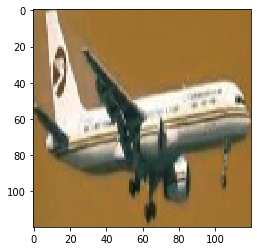

In [37]:
d = X_test1[450]
plt.imshow(d)

So, we predicted it as airplane and it is airplane which means our model has predicted right.

**Results and Comparison**

In [51]:
print('\nRandom Forest Classifier:\n')
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(pred,y_test))
print('Classification Report:\n',classification_report(pred,y_test))
print('\n Accuracy score:',accuracy_score(pred,y_test))

print('\nConvolutional Neural Network:\n')
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(pred_cnn,y_test1))
print('Classification Report:\n',classification_report(pred_cnn,y_test1))
print('\n Accuracy score:',accuracy_score(pred_cnn,y_test1))


Random Forest Classifier:

Confusion Matrix:
 [[210   4   7   4  10   0   4   0]
 [ 15 261  30  13  23   1  17   2]
 [ 10  12 189 100  32   0  14  11]
 [  2   8  42  80  16   0   9   4]
 [  8   7  14  19 178   0  10   7]
 [  0   2   1   3   0 346   0   0]
 [  8   3   4   6   5   0 213   2]
 [  1   0   2   2   0   0   0 306]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       239
           1       0.88      0.72      0.79       362
           2       0.65      0.51      0.58       368
           3       0.35      0.50      0.41       161
           4       0.67      0.73      0.70       243
           5       1.00      0.98      0.99       352
           6       0.80      0.88      0.84       241
           7       0.92      0.98      0.95       311

    accuracy                           0.78      2277
   macro avg       0.76      0.77      0.76      2277
weighted avg       0.79      0.78      0.78      227

From the above results, we conclude that CNN performs better (accuracy = 90%) on image data as compared to Random Forest Classifier (accuracy = 78%).

**Saving the Model**

In [54]:
#saving the model
#converting the model to json format
model_json = model.to_json()

In [56]:
json_file=open('model_n.json','w')
json_file#creates an empty file with write capability

<_io.TextIOWrapper name='model_n.json' mode='w' encoding='cp1252'>

In [57]:
json_file.write(model_json)
model.save_weights('model_n.h5')

In [58]:
model_json = model.to_json()

with open('model.json','w') as json_file:
    json_file.write(model_json)
model.save_weights('model_n.h5')

Model Saved Successfully.